<a href="https://colab.research.google.com/github/Akashkunwar/credit-card-fraud-detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://raw.githubusercontent.com/Akashkunwar/credit-card-fraud-detection/main/images/credit%20card.png"></center><br>

#Credit Card Frauds Detection by using Machine Learning

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In this project, I'll use **scikit-learn**, **XG-Boost** and many more library to prediction model that can tell or detect when transaction is deriving from fraud or a genuine purchase. Here i will compare between some of the most famous machone learning algorithem which are uses in classification.

# Importing all the necessary python packages:

In [ ]:
pip install opendatasets --quiet

In [ ]:
pip install -U kaleido --quiet

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme(context = 'notebook', style='darkgrid',palette='muted')

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
import xgboost

import warnings
warnings.filterwarnings("ignore")

# Downloading Data

The dataset is on <a href= "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">Credit Card Fraud Detection</a> contains credit card transactions that were made in September, 2013 by european clients during two days.

In [ ]:
od.download('https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud')
# 28484dff151bf6535f78c0ef3529f7c428484dff151bf6535f78c0ef3529f7c4

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kunwarakash
Your Kaggle Key: ··········


100%|██████████| 66.0M/66.0M [00:00<00:00, 142MB/s]


In [ ]:
data = pd.read_csv('/content/creditcardfraud/creditcard.csv')
pd.set_option('display.max_columns', None)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis<br>

The feature amount, contain transaction amount
and the tarfet column class, which tells us if that certain transaction is genuine or a fraud, where 1 = fraud and 0 = genuine.
Features V1, V2,... V28 are numerical input variables which is masked data, whose content couldn't be displayed due to their **confidential** nature.

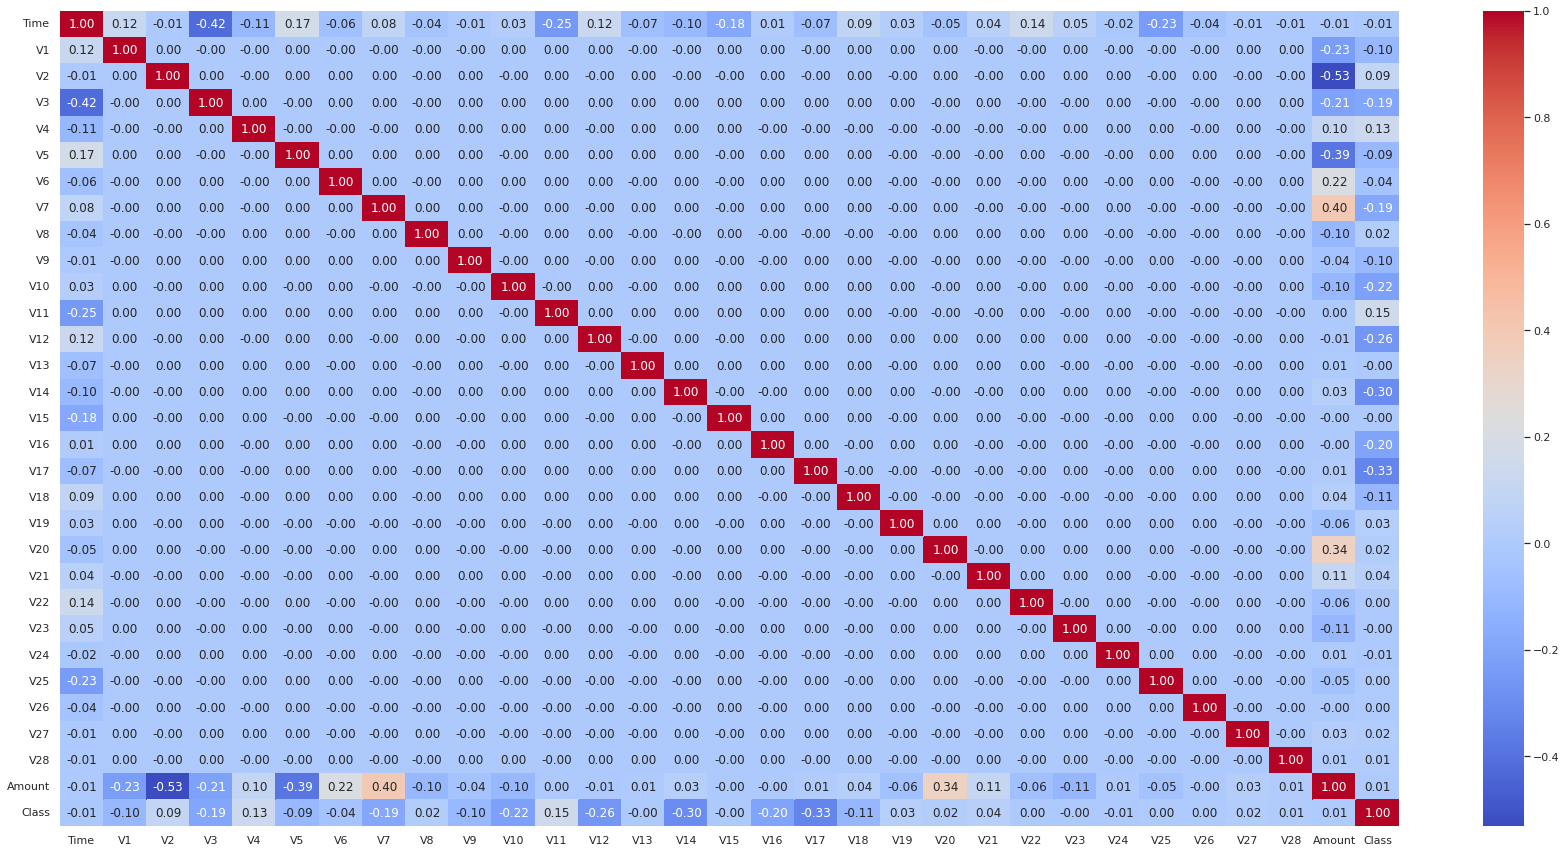

In [ ]:
corr = data.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', annot=True)
plt.show()

**75%** of transactions in the analyzed period were **up to €77.16**.<br><br>
The **maximum amount** identified during this period was **€25,691.16**, way higher than the **average amount of €88.35**.

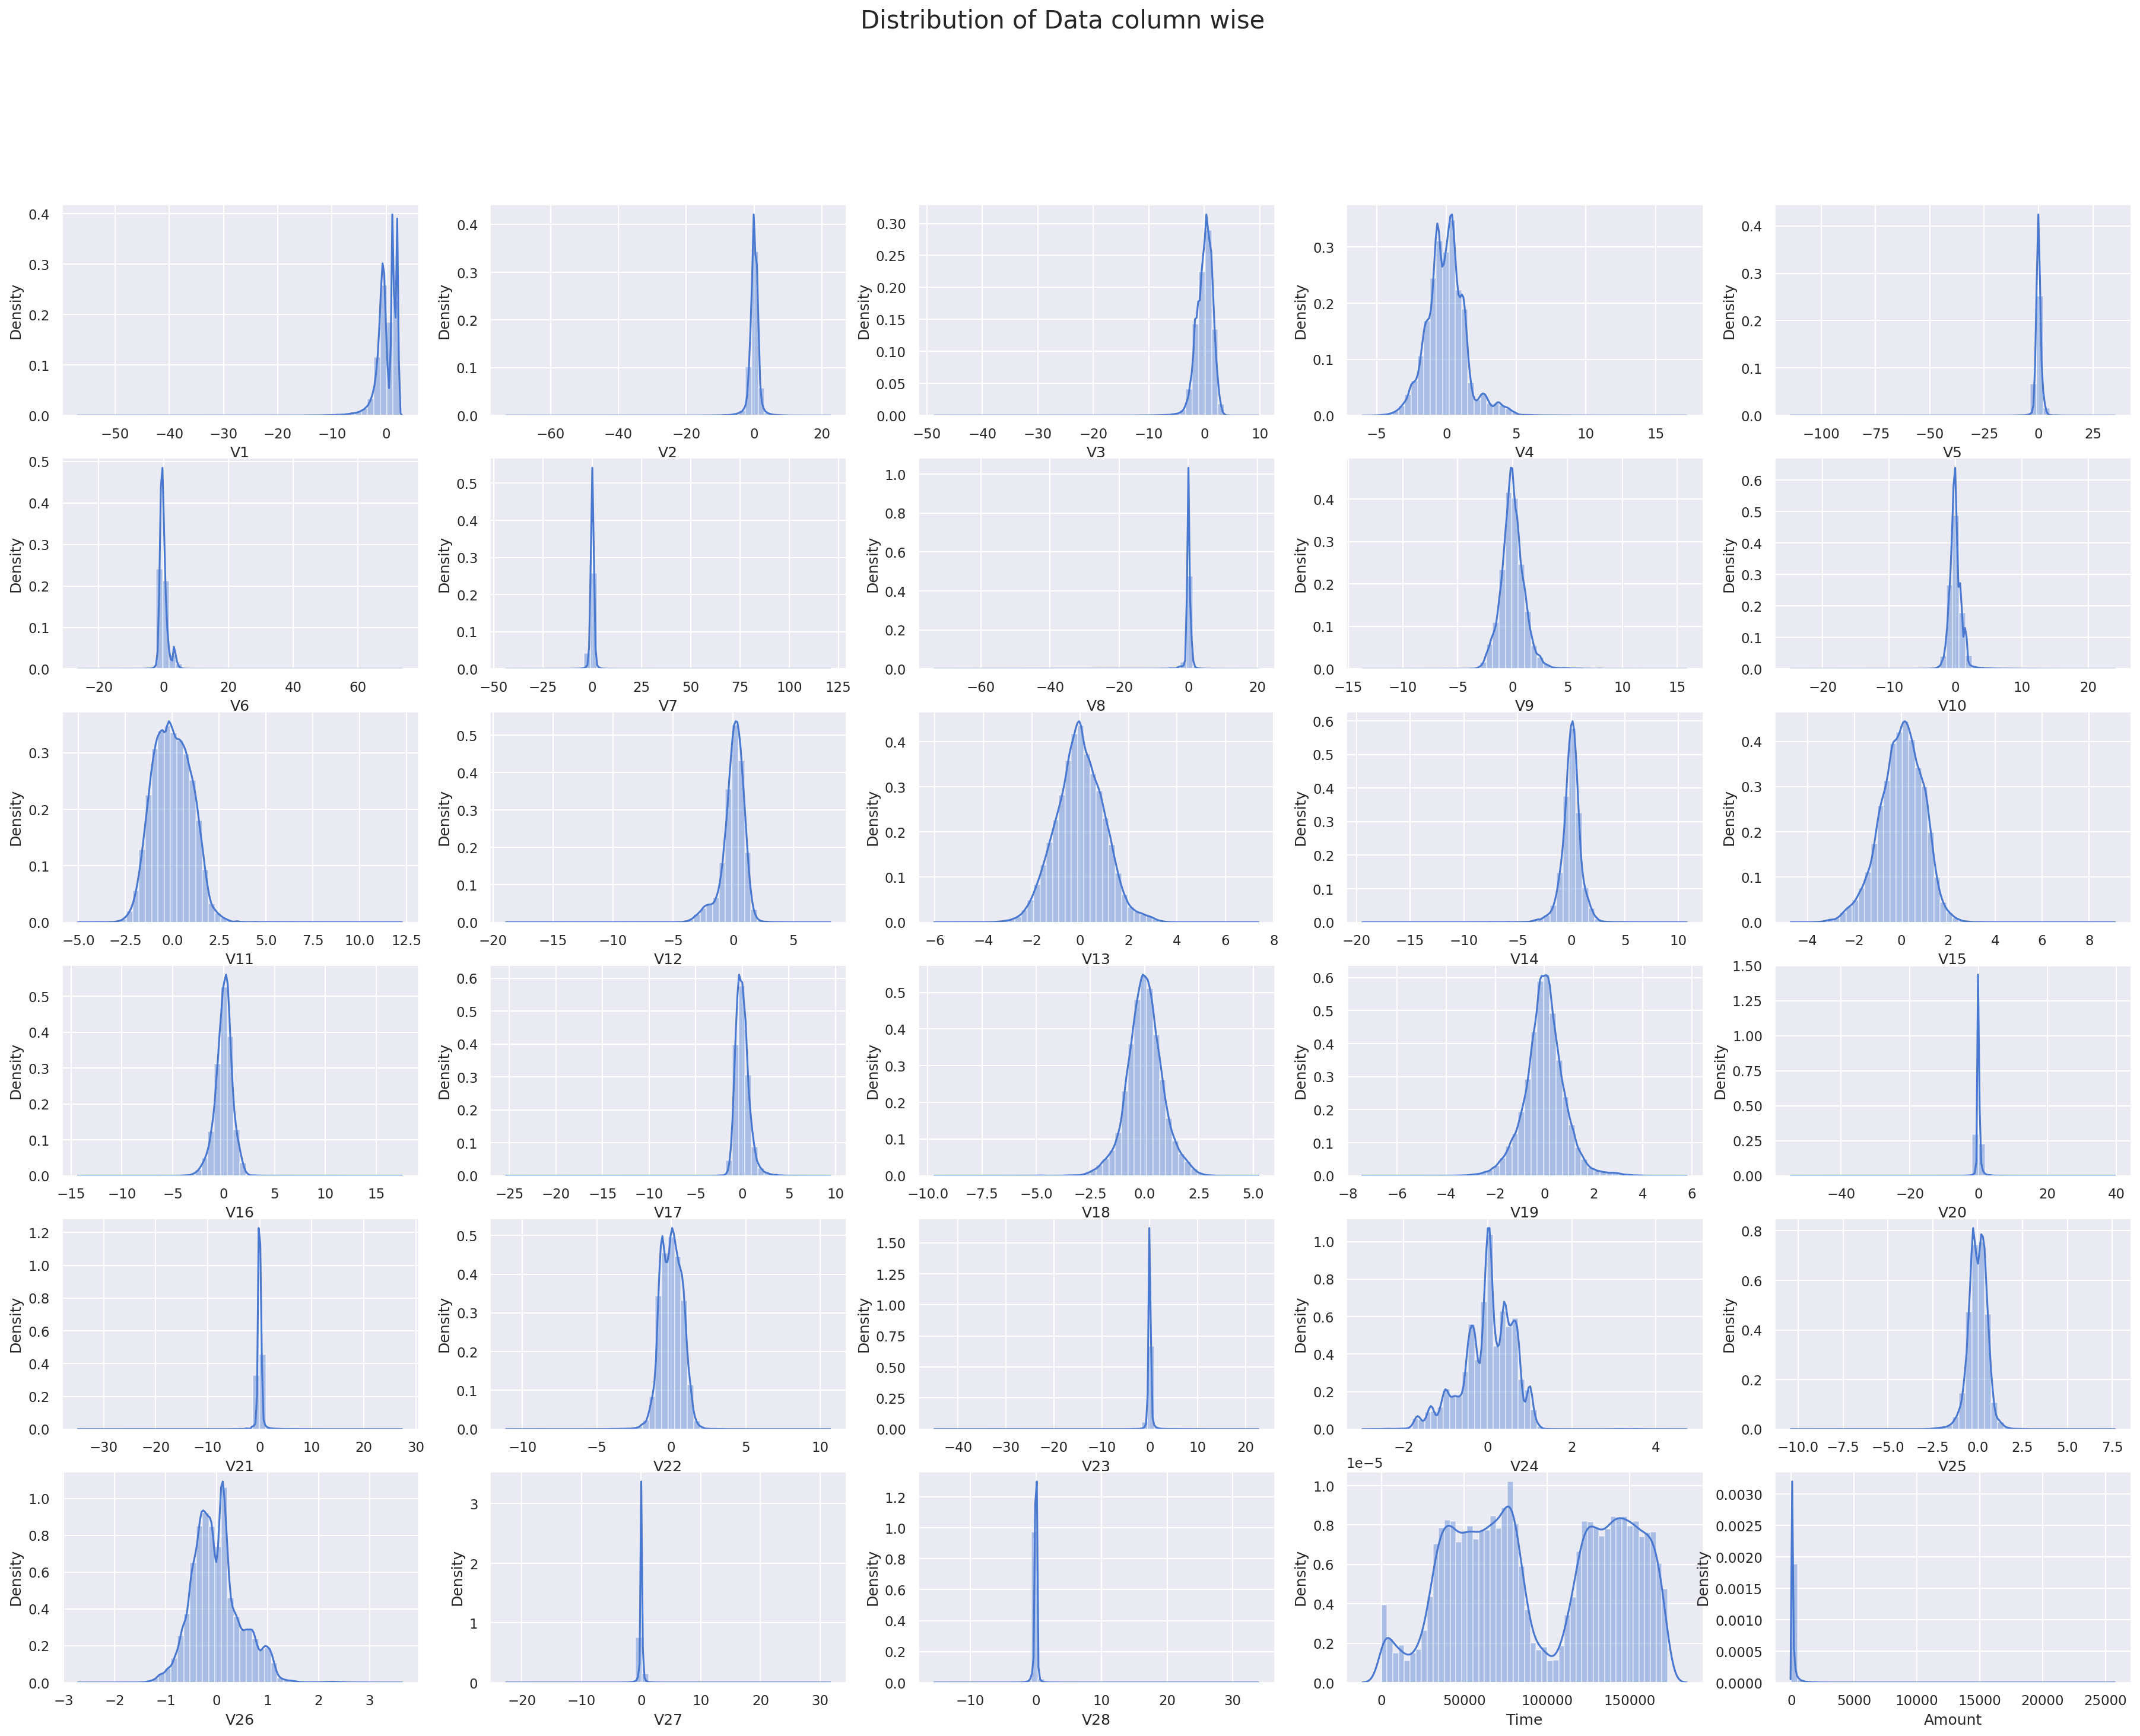

In [ ]:
plt.figure(figsize=(30, 22), dpi=150)

plt.subplot(6,5,1)
sns.distplot(data.V1)

plt.subplot(6,5,2)
sns.distplot(data.V2)

plt.subplot(6,5,3)
sns.distplot(data.V3)

plt.subplot(6,5,4)
sns.distplot(data.V4)

plt.subplot(6,5,5)
sns.distplot(data.V5)

plt.subplot(6,5,6)
sns.distplot(data.V6)

plt.subplot(6,5,7)
sns.distplot(data.V7)

plt.subplot(6,5,8)
sns.distplot(data.V8)

plt.subplot(6,5,9)
sns.distplot(data.V9)

plt.subplot(6,5,10)
sns.distplot(data.V10)

plt.subplot(6,5,11)
sns.distplot(data.V11)

plt.subplot(6,5,12)
sns.distplot(data.V12)

plt.subplot(6,5,13)
sns.distplot(data.V13)

plt.subplot(6,5,14)
sns.distplot(data.V14)

plt.subplot(6,5,15)
sns.distplot(data.V15)

plt.subplot(6,5,16)
sns.distplot(data.V16)

plt.subplot(6,5,17)
sns.distplot(data.V17)

plt.subplot(6,5,18)
sns.distplot(data.V18)

plt.subplot(6,5,19)
sns.distplot(data.V19)

plt.subplot(6,5,20)
sns.distplot(data.V20)

plt.subplot(6,5,21)
sns.distplot(data.V21)

plt.subplot(6,5,22)
sns.distplot(data.V22)

plt.subplot(6,5,23)
sns.distplot(data.V23)

plt.subplot(6,5,24)
sns.distplot(data.V24)

plt.subplot(6,5,25)
sns.distplot(data.V25)

plt.subplot(6,5,26)
sns.distplot(data.V26)

plt.subplot(6,5,27)
sns.distplot(data.V27)


plt.subplot(6,5,28)
sns.distplot(data.V28)

plt.subplot(6,5,29)
sns.distplot(data.Time)

plt.subplot(6,5,30)
sns.distplot(data.Amount)

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

Interpretation:- 

Here as we can see the distribution of data in all the columns are mixed some columns are normally distributed and some are not in most of the cases and in very few column seems normally distributed data and most column has skewed data. Means data is imbalanced.

<Figure size 54x36 with 0 Axes>

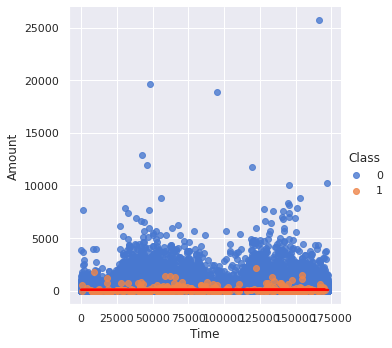

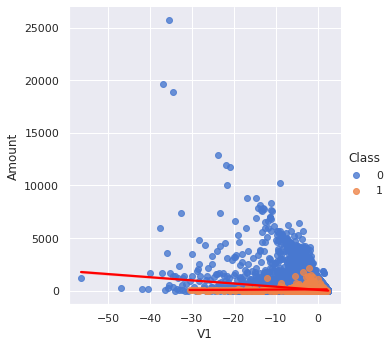

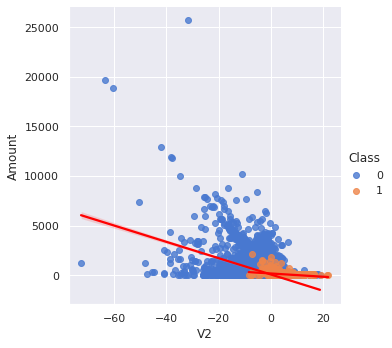

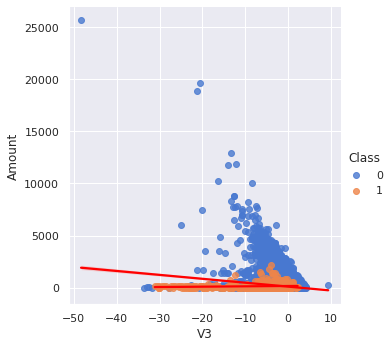

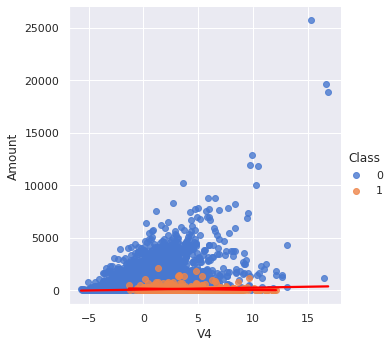

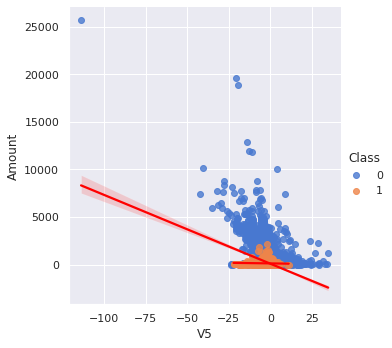

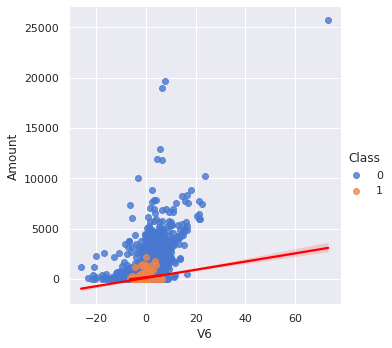

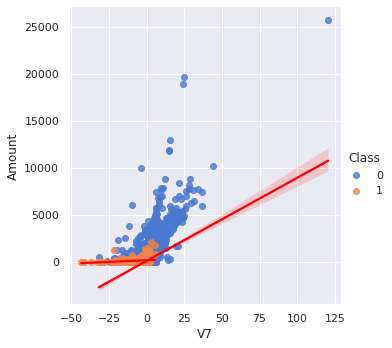

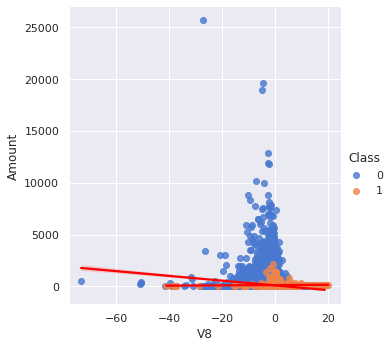

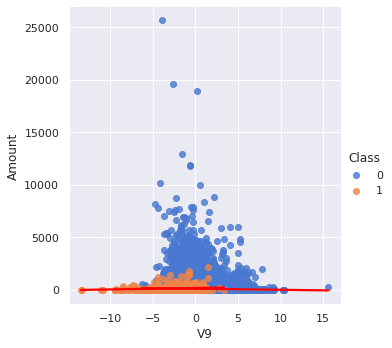

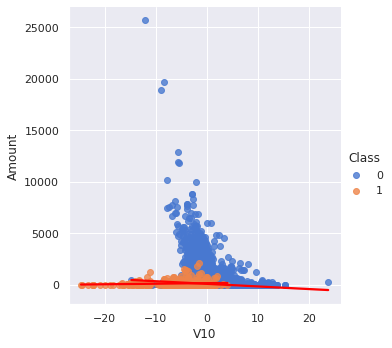

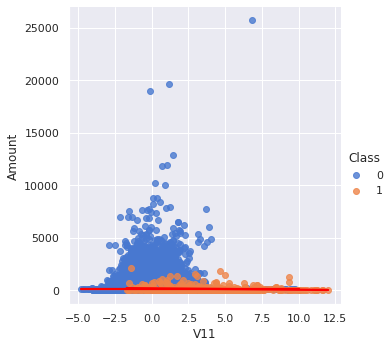

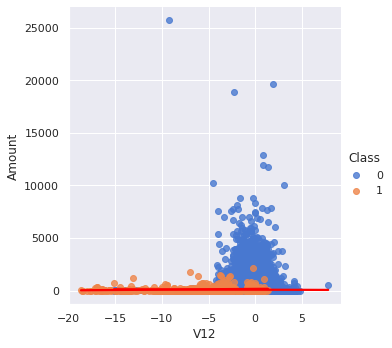

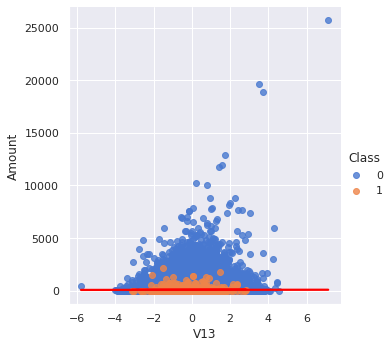

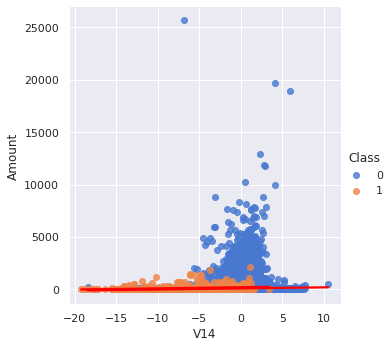

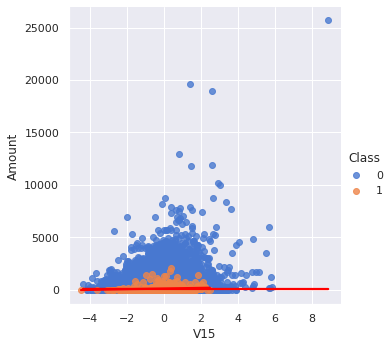

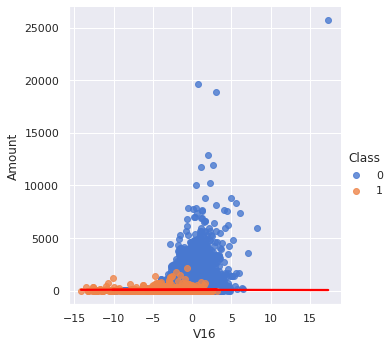

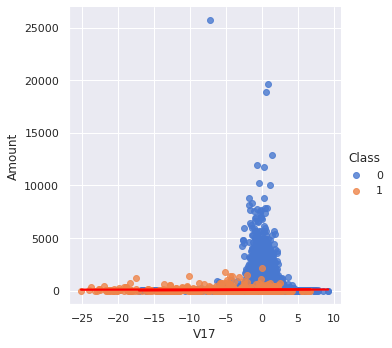

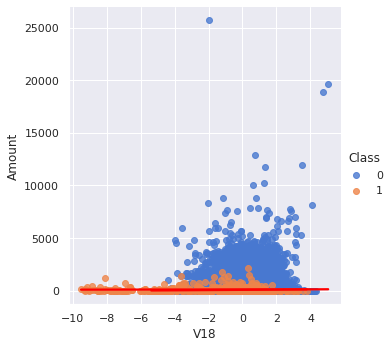

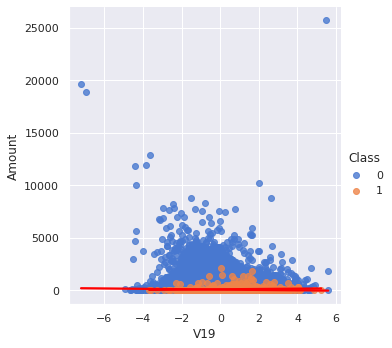

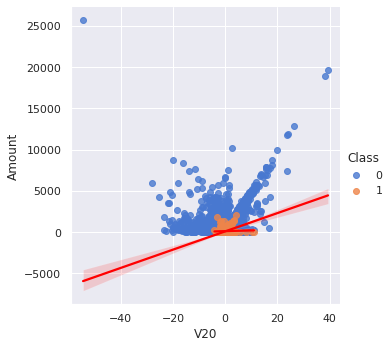

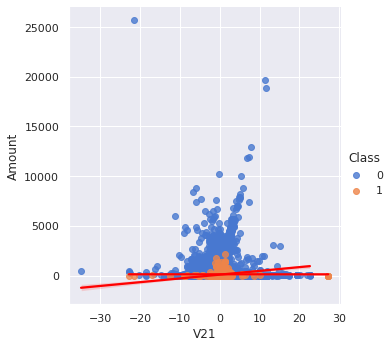

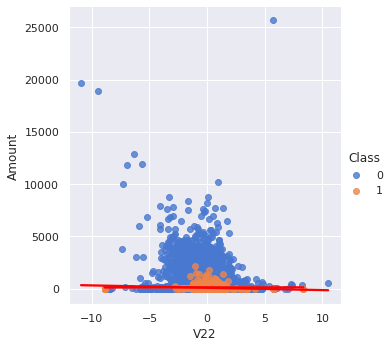

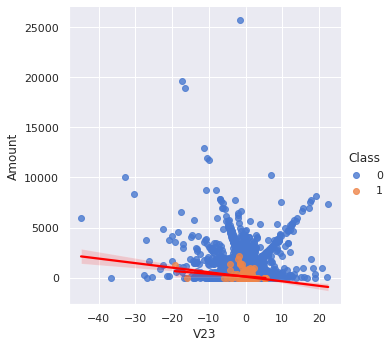

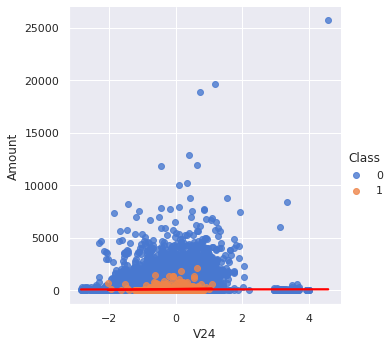

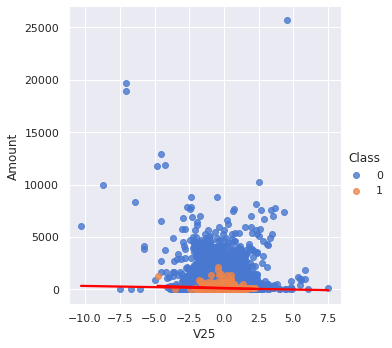

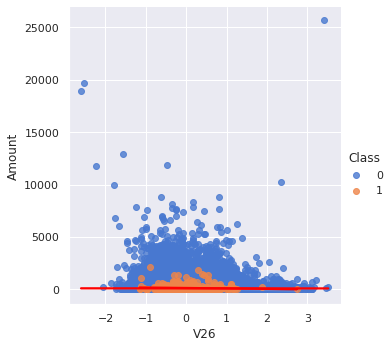

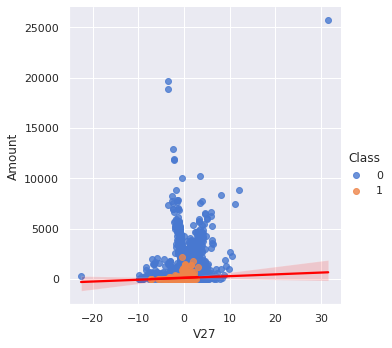

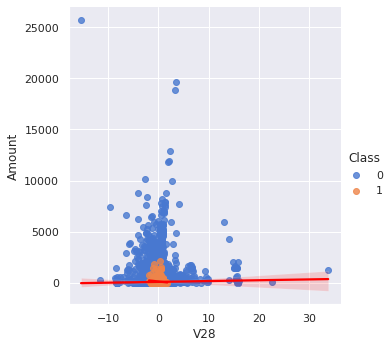

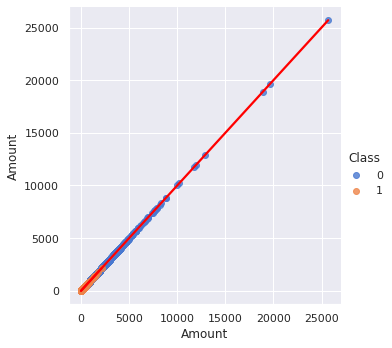

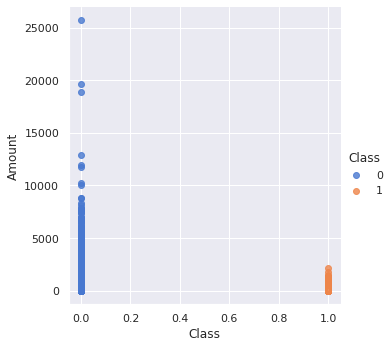

In [ ]:
plt.gcf().set_size_inches(0.75, 0.5)
for col in data.columns:
  sns.lmplot(x=col, y='Amount', hue='Class', data=data, line_kws={"color": "red"})
  plt.show()

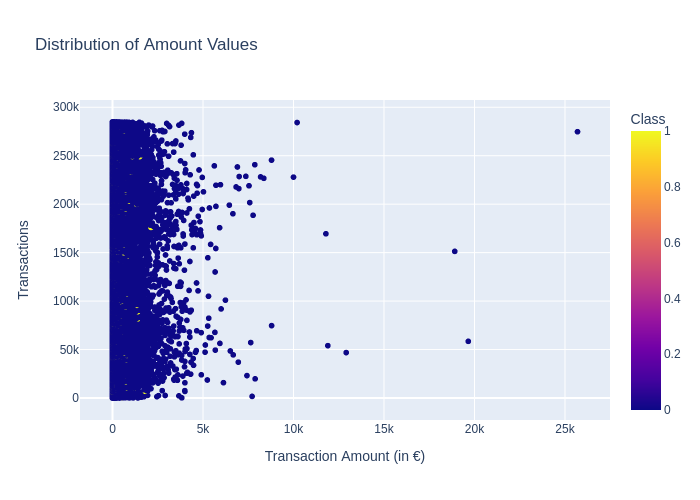

In [ ]:
# Distribution of Amounts in class

fig = px.scatter(data, x = 'Amount', y =data.index, color = data.Class,
                title = 'Distribution of Amount in respect of class')
fig.update_layout(xaxis_title='Transaction Amount',
                    yaxis_title='Transactions')
fig.show('png')

It looks like most transactions are genuine, represented by the **blue** dots on the chart above. We can also see that all high value transactions were genuine, with apparently **no fraudulent** transaction made being **above €5,000.00**<br><br>
However, it seems hard to identify the fraudulent transactions, painted **yelow**, looking at the distribution of **amount values**. This leaves us with a question: **How many transactions were in fact fraud?**

# Class Distribution

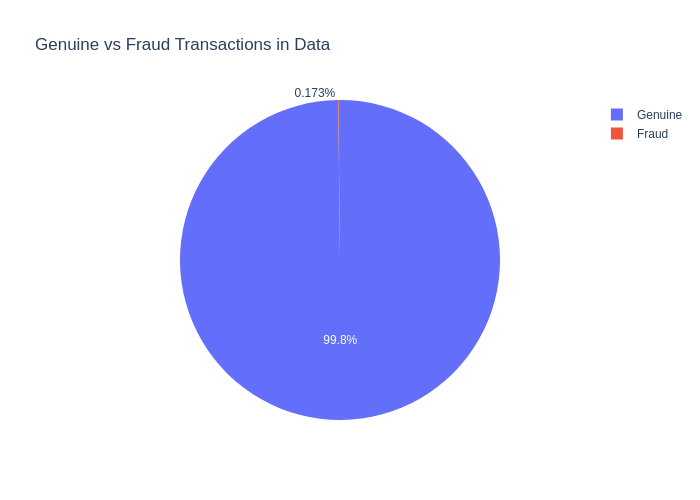

In [ ]:
# Visualizing the Class distribution
fig = px.pie(data.Class,values = data.Class.value_counts(),
             names=['Genuine', 'Fraud'], title='Genuine vs Fraud Transactions in Data')
fig.show('png')

So it seems **only 492** transactions in the dataset were **fraudulent** which represents **only 0.173%** of data, there is a **huge class imbalance** that we have to work on here!

75% percent of frauds were **below** the amount of **€105.89** and the largest fraud amount was €2,125.87. Let's see those values distributed in a chart.

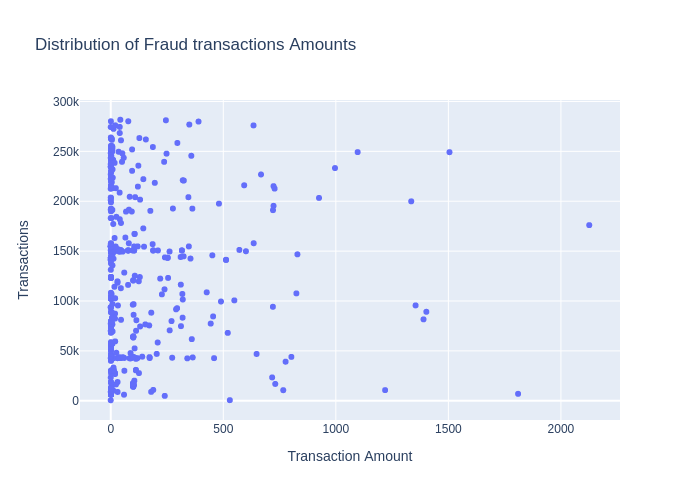

In [ ]:
# Distribution of fraud transactions amount
fig = px.scatter(data.query("Class==1"), x = 'Amount', y =data.query("Class==1").index,
                title = 'Distribution of Fraud transactions Amounts')
fig.update_layout(xaxis_title='Transaction Amount',
                    yaxis_title='Transactions')
fig.show('png')

# Preparing Data

The dataset has the feature **time**, which shows us the seconds elapsed between each transaction and the first transaction in the dataset. We will drop time which is not important for us.


In [ ]:
data = data.drop(columns = ['Time'], axis = 1)

In [ ]:
features = data.drop(columns=['Class'], axis=1)
target = data.Class

# Splitting the data for training and testing
Now, we will split our data into  training & testing dataframe. which will be in ratio of 70:30 in this case.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= .3, random_state = 7)

In [ ]:
print("Data Size after Splitting : ")
print('-----------------------------------')
print('X Train size : ', X_train.shape,' :', "%s%%"%round((len(X_train) / (len(X_train) + len(X_test))) * 100))
print('X Test size  : ', X_test.shape,'  :',"%s%%"%round((len(X_test) / (len(X_train) + len(X_test))) * 100))
print('-----------------------------------')
print('Y Train size : ', y_train.shape,'    :', "%s%%"%round((len(y_train) / (len(y_train) + len(y_test))) * 100))
print('Y Test size  : ', y_test.shape,'     :',"%s%%"%round((len(y_test) / (len(y_train) + len(y_test))) * 100))
print('-----------------------------------')

Data Size after Splitting : 
-----------------------------------
X Train size :  (199364, 29)  : 70%
X Test size  :  (85443, 29)   : 30%
-----------------------------------
Y Train size :  (199364,)     : 70%
Y Test size  :  (85443,)      : 30%
-----------------------------------


# Scalling

In [ ]:
# Scaling data on the training set
ss = StandardScaler()
X_train['Amount'] = ss.fit_transform(X_train.Amount.values.reshape(-1,1))

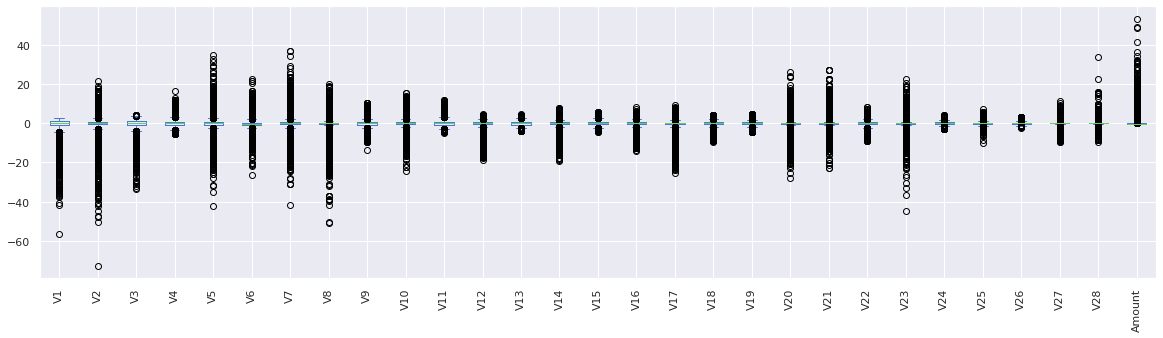

In [ ]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()

Interpretation:- 

Here we can clearly see in our features column are pretty small and are in range of approximately +40 to -40.

# Imbalanced-learning
Here we have imbalanced data, so we have to use **SMOTE** which is an **oversampling technique**.
SMOTE will generate more similar fraudulent data based on the frauds that we already have in the original dataset.

In [ ]:
target.value_counts() # 0 = Genuine Transactions | 1 = Fraud

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
X_train, y_train = SMOTE().fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

0    199027
1    199027
Name: Class, dtype: int64

In [ ]:
print("Data Size after Oversampling : ")
print('-----------------------------------')
print('X Train size : ', X_train.shape,' :', "%s%%"%round((len(X_train) / (len(X_train) + len(X_test))) * 100))
print('X Test size  : ', X_test.shape,'  :',"%s%%"%round((len(X_test) / (len(X_train) + len(X_test))) * 100))
print('-----------------------------------')
print('Y Train size : ', y_train.shape,'    :', "%s%%"%round((len(y_train) / (len(y_train) + len(y_test))) * 100))
print('Y Test size  : ', y_test.shape,'     :',"%s%%"%round((len(y_test) / (len(y_train) + len(y_test))) * 100))
print('-----------------------------------')

Data Size after Oversampling : 
-----------------------------------
X Train size :  (398054, 29)  : 82%
X Test size  :  (85443, 29)   : 18%
-----------------------------------
Y Train size :  (398054,)     : 82%
Y Test size  :  (85443,)      : 18%
-----------------------------------


# Model Traning

From here on we will start building diffrent model like Logistic Regression,	Random Forest Classifier,	Decision Tree Classifier,	Ada Boost Classifier,	Gradient Boosting Classifier,	xgboost,	K-Neighbors Classifier on top of data which we have prepared till now and we will try all different kind of machine learning models and try to get best Accuracy, Precision, Recall, F1_score, AUROC score for all 3 type of data that are normaldata, MinMaxScaled data and StandardScaler data.

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=150)
lr.fit(X_train, y_train)

y_predictions_lr = lr.predict(X_test)

# Random Forest Classifier 
rf = RandomForestClassifier(n_estimators = 100, random_state = 7)
rf.fit(X_train,y_train)

y_predictions_rf = rf.predict(X_test)

# Decision Tree Classifier 
dt = DecisionTreeClassifier(random_state = 7)
dt.fit(X_train,y_train)

y_predictions_dt = dt.predict(X_test)

# Ada Boost Classifier 
ab = AdaBoostClassifier(n_estimators = 100, random_state = 7)
ab.fit(X_train,y_train)

y_predictions_ab = ab.predict(X_test)

# Gradient Boosting Classifier 
gb = GradientBoostingClassifier(n_estimators = 100, random_state = 7)
gb.fit(X_train,y_train)

y_predictions_gb = gb.predict(X_test)

# xgboost Classifier
xg = xgboost.XGBClassifier()
xg.fit(X_train,y_train)

y_predictions_xg = xg.predict(X_test)

# KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train,y_train)

y_predictions_kn = kn.predict(X_test)

## Accuracy score

In [ ]:

met = ['Accuracy','Precision','Recall','F1_score','AUROC']

lgr = [accuracy_score(y_test, y_predictions_lr),precision_score(y_test, y_predictions_lr),recall_score(y_test, y_predictions_lr),f1_score(y_test, y_predictions_lr),(roc_auc_score(y_test, y_predictions_lr) * 100)]
rfc = [accuracy_score(y_test, y_predictions_rf),precision_score(y_test, y_predictions_rf),recall_score(y_test, y_predictions_rf),f1_score(y_test, y_predictions_rf),(roc_auc_score(y_test, y_predictions_rf) * 100)]
dtc = [accuracy_score(y_test, y_predictions_dt),precision_score(y_test, y_predictions_dt),recall_score(y_test, y_predictions_dt),f1_score(y_test, y_predictions_dt),(roc_auc_score(y_test, y_predictions_dt) * 100)]
abc = [accuracy_score(y_test, y_predictions_ab),precision_score(y_test, y_predictions_ab),recall_score(y_test, y_predictions_ab),f1_score(y_test, y_predictions_ab),(roc_auc_score(y_test, y_predictions_ab) * 100)]
gbc = [accuracy_score(y_test, y_predictions_gb),precision_score(y_test, y_predictions_gb),recall_score(y_test, y_predictions_gb),f1_score(y_test, y_predictions_gb),(roc_auc_score(y_test, y_predictions_gb) * 100)]
xgb = [accuracy_score(y_test, y_predictions_xg),precision_score(y_test, y_predictions_xg),recall_score(y_test, y_predictions_xg),f1_score(y_test, y_predictions_xg),(roc_auc_score(y_test, y_predictions_xg) * 100)]
knn = [accuracy_score(y_test, y_predictions_kn),precision_score(y_test, y_predictions_kn),recall_score(y_test, y_predictions_kn),f1_score(y_test, y_predictions_kn),(roc_auc_score(y_test, y_predictions_kn) * 100)]

dic = {"Metric":met, 'Logistic Regression':lgr, 'Random Forest Classifier':rfc, 'Decision Tree Classifier':dtc, 'Ada Boost Classifier':abc, 'Gradient Boosting Classifier':gbc, 'xgboost':xgb, 'K-Neighbors Classifier':knn}

In [ ]:
pd.DataFrame(dic)

,Metric,Logistic Regression,Random Forest Classifier,Decision Tree Classifier,Ada Boost Classifier,Gradient Boosting Classifier,xgboost,K-Neighbors Classifier
0,Accuracy,0.064324,0.999532,0.991597,0.955877,0.991503,0.987863,0.997460
1,Precision,0.001923,0.891156,0.153752,0.037132,0.166861,0.123720,0.365217
2,Recall,0.993548,0.845161,0.806452,0.935484,0.922581,0.935484,0.541935
3,F1_score,0.003838,0.867550,0.258264,0.071429,0.282609,0.218538,0.436364
4,AUROC,52.809161,92.248685,89.919241,94.569898,95.710451,96.172116,77.011182


<Figure size 6000x3600 with 0 Axes>

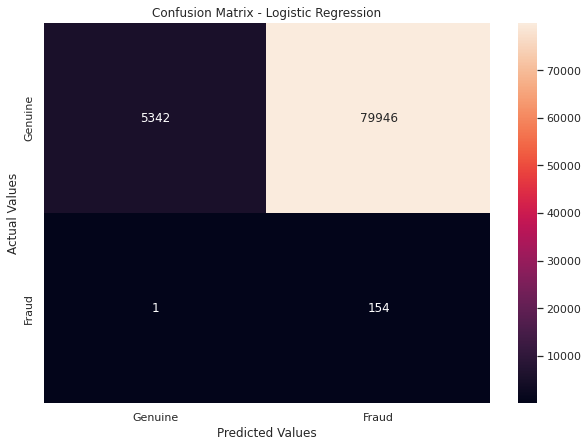

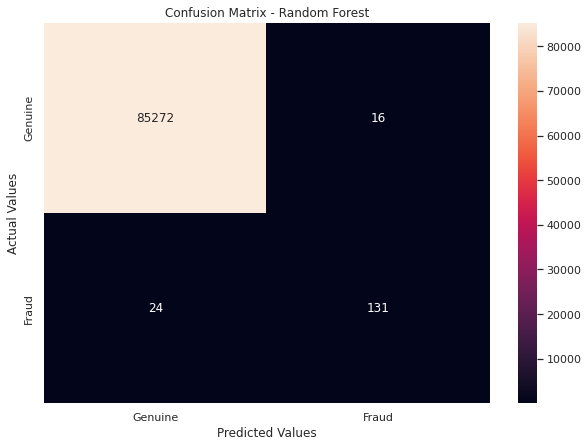

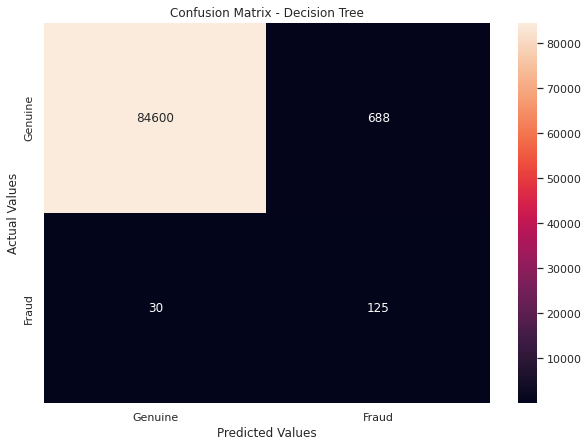

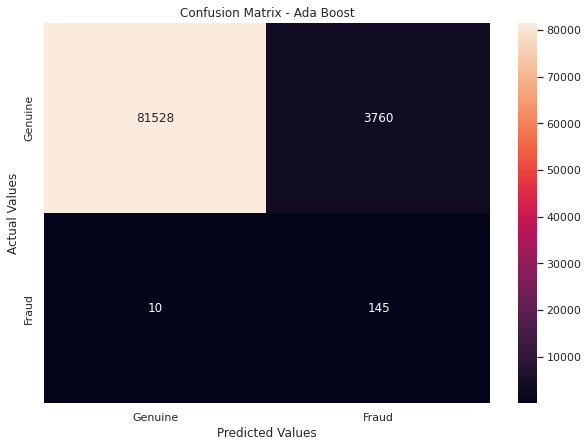

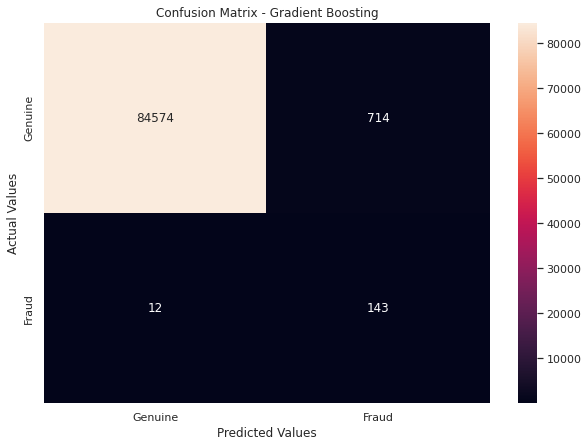

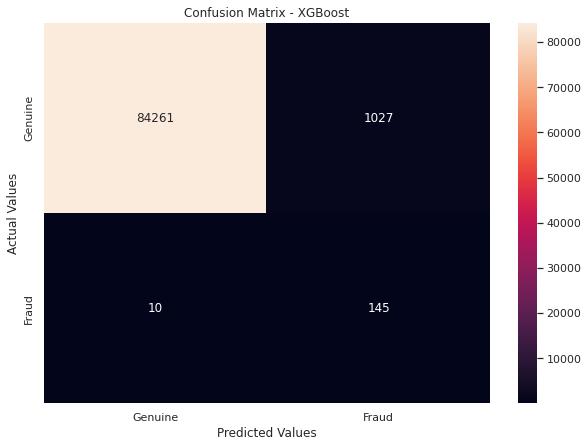

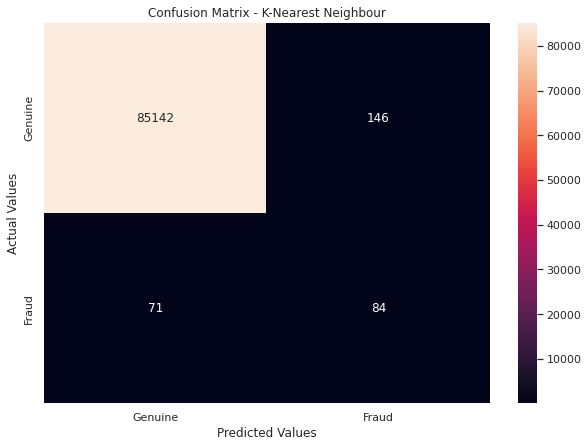

In [ ]:
plt.figure(figsize=(30, 18), dpi=200)

# plt.subplot(2,3,1)
# Confusion Matrix for Logistic Regression
confusion_matrix_lr = confusion_matrix(y_test, y_predictions_lr)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_lr, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
# plt.show()

# plt.subplot(2,3,2)
# Confusion Matrix for Random Forest
confusion_matrix_rf = confusion_matrix(y_test, y_predictions_rf)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
# plt.show()

# plt.subplot(2,3,3)
# Confusion Matrix for Decision Tree
confusion_matrix_dt = confusion_matrix(y_test, y_predictions_dt)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
# plt.show()

# plt.subplot(2,3,4)
# Confusion Matrix for Ada Boost
confusion_matrix_ab = confusion_matrix(y_test, y_predictions_ab)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ab, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Ada Boost')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
# plt.show()

# plt.subplot(2,3,5)
# Confusion Matrix for Gradient Boosting
confusion_matrix_gb = confusion_matrix(y_test, y_predictions_gb)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Gradient Boosting')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
# plt.show()

# plt.subplot(2,3,6)
# Confusion Matrix for XGBoost
confusion_matrix_xg = confusion_matrix(y_test, y_predictions_xg)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_xg, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - XGBoost')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
# plt.show()

# Confusion Matrix for K-Nearest Neighbour
confusion_matrix_kn = confusion_matrix(y_test, y_predictions_kn)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_kn, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - K-Nearest Neighbour')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

Considering we have **155 fraudulent transactions** in our testing set, and the **goal of our model is predicting these fraudulent transactions**, we can realize that the model which **best performed such task** was the **xgboost** model which predicted **145 fraudulent transactions out of 155**, with a **96.17% of AUROC Score**, the highest one of all the models tested, which indicates **how well our model detects fradulent transactions from our testing set**.

# Conclusion

In this project, my goal is to **detect all the fraudulent transactions**, best suited model for this task is **xgboost** with a **AUROC score of 96.172%**, which is considered as most supperior matric for classification problem. That correctly detect 145 fraudulent transactions out of 155. When we work with a **machine learning model** we must always know for a fact what it is that we're trying to get from that model.<br><br> Considering we have **155 fraudulent transactions** in our testing set, and the **goal of our model is predicting these fraudulent transactions**, we can realize that the model which **best performed such task** was the **xgboost** model which predicted **145 fraudulent transactions out of 155**, with a **96.17% of AUROC Score**, the highest one of all the models tested, which indicates **how well our model detects fradulent transactions from our testing set**.<br> 
This model can firther be improved by testing all the parameters and trying to find more suitable splittion, imbalanced learning and machine learning technique if available in public domain.
Thanks...